In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import sklearn
from datetime import datetime

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
train_df = pd.read_csv('./train/train.csv', encoding='utf8')
train_df.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,0,5,N,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,0,0,N,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,0,5,N,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,0,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,0,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521787 entries, 0 to 1521786
Data columns (total 23 columns):
acqic        1521787 non-null int64
bacno        1521787 non-null int64
cano         1521787 non-null int64
conam        1521787 non-null float64
contp        1521787 non-null int64
csmcu        1521787 non-null int64
ecfg         1521787 non-null object
etymd        1521787 non-null int64
flbmk        1509206 non-null object
flg_3dsmk    1509206 non-null object
fraud_ind    1521787 non-null int64
hcefg        1521787 non-null int64
insfg        1521787 non-null object
iterm        1521787 non-null int64
locdt        1521787 non-null int64
loctm        1521787 non-null float64
mcc          1521787 non-null int64
mchno        1521787 non-null int64
ovrlt        1521787 non-null object
scity        1521787 non-null int64
stocn        1521787 non-null int64
stscd        1521787 non-null int64
txkey        1521787 non-null int64
dtypes: float64(2), int64(16), object(5)
memory us

In [4]:
train_df['loctm'] = train_df.loctm.astype(int).astype(str).str.zfill(6)

train_df['loctm'] = pd.to_datetime(train_df.loctm, format='%H%M%S', errors='raise')
train_df['loctm'] = train_df.loctm.dt.time

0    1501432
1      20355
Name: fraud_ind, dtype: int64

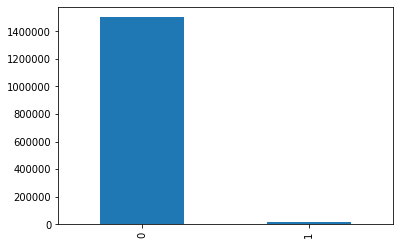

In [6]:
count_classes = train_df.fraud_ind.value_counts()
count_classes.plot(kind='bar')
count_classes

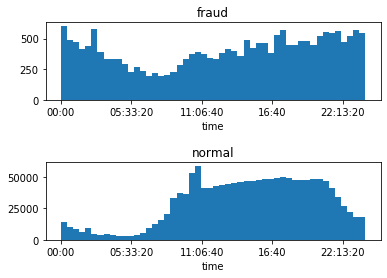

In [7]:
%matplotlib inline
bins = 50 
plt.subplot(2,1,1)
plt.hist(train_df.loctm[train_df.fraud_ind==1], bins=bins)
plt.title('fraud')

plt.subplot(2,1,2)
plt.hist(train_df.loctm[train_df.fraud_ind==0], bins=bins)
plt.title('normal')

plt.subplots_adjust(wspace=0, hspace=0.8)

In [8]:
import seaborn as sns
from matplotlib import gridspec

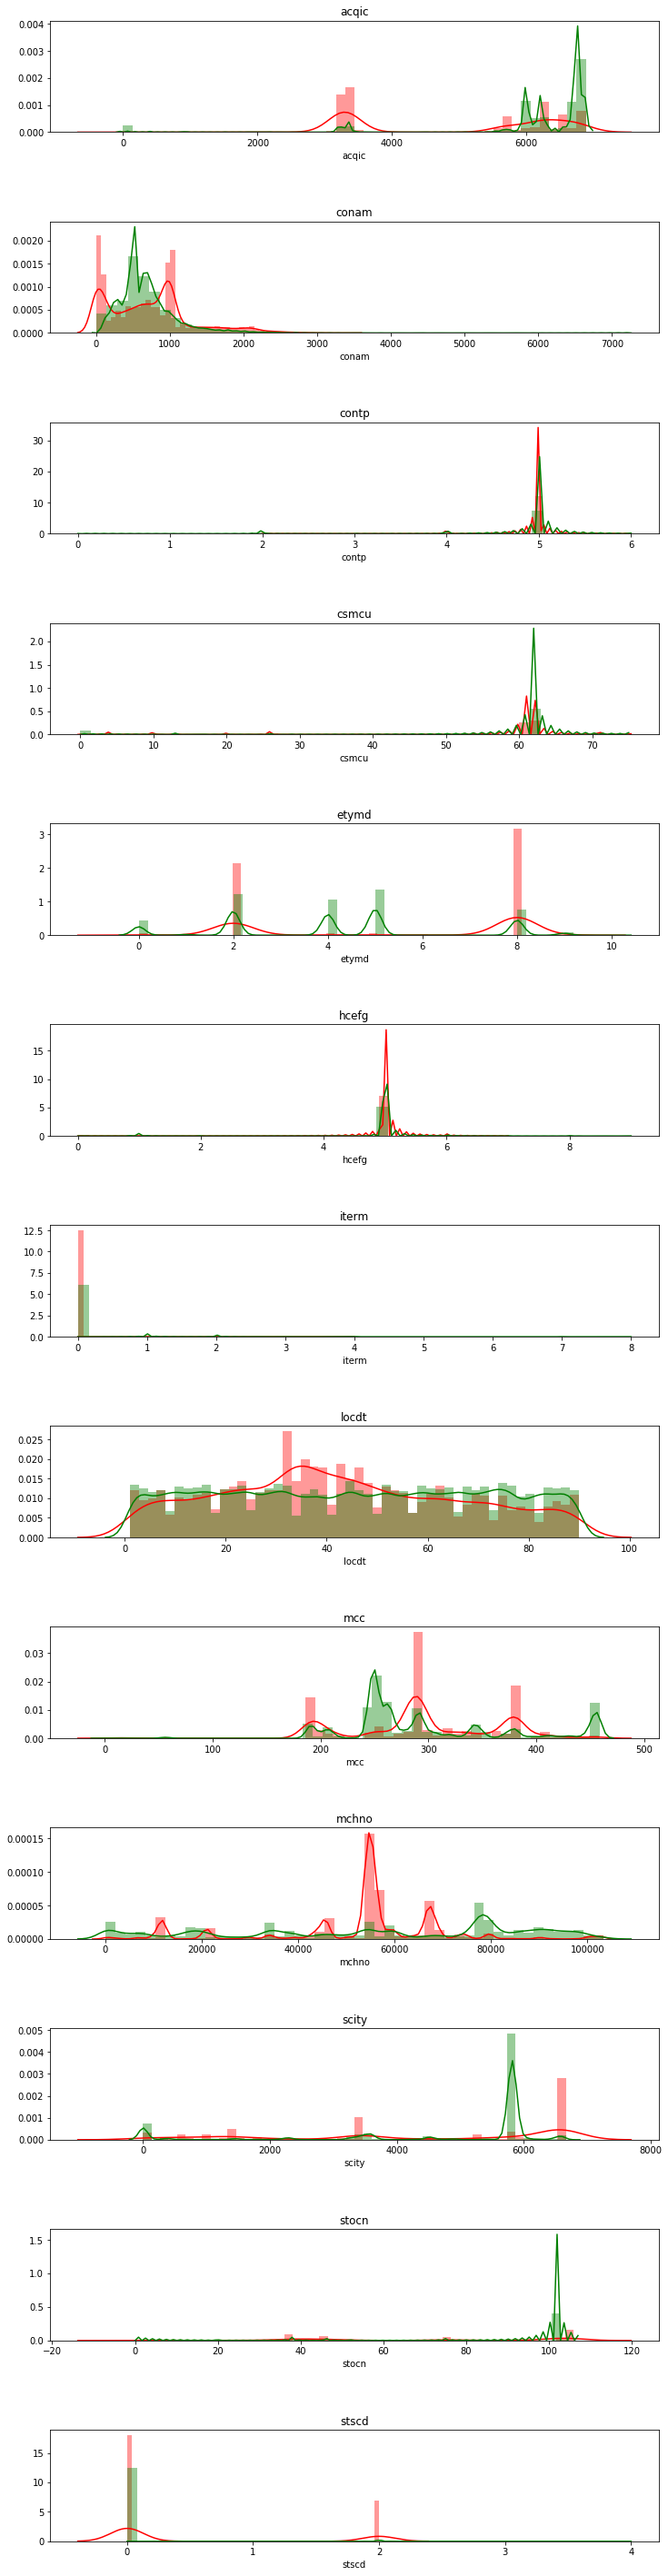

In [9]:
features = [ feature for feature in train_df.columns if feature not in [
    'bacno', 'txkey', 'cano', 'fraud_ind', 'ecfg', 'flbmk', 'flg_3dsmk', 'insfg', 'ovrlt', 'loctm'] ]
plt.figure(figsize=(12, 28*4))
gs = gridspec.GridSpec(28, 1)
for i, k in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(train_df[k][train_df.fraud_ind==1], bins=50, color='red')
    sns.distplot(train_df[k][train_df.fraud_ind==0], bins=50, color='green')
    ax.set_title(str(k))

plt.subplots_adjust(wspace=0, hspace=0.8)

In [10]:
# !jupyter nbconvert --to html credit_card_fraud_analysis.ipynb